<a href="https://colab.research.google.com/github/Run-aivle/study/blob/main/March/03.14/SEN/CNN(augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2023-03-14 13:11:27--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat.1’

notMNIST_small.mat. 100%[===================>] 112.14M  18.0MB/s    in 7.3s    

2023-03-14 13:11:35 (15.3 MB/s) - ‘notMNIST_small.mat.1’ saved [117586976/117586976]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [3]:
data = io.loadmat('notMNIST_small.mat')

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

In [5]:
x = data['images']
y = data['labels']

In [6]:
x = np.transpose(x, (2, 0, 1))

In [7]:
print(x.shape)

(18724, 28, 28)


- x, y 타입 변환

In [8]:
y = y.astype('int32')
x = x.astype('float32')

- reshape

In [9]:
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
x.shape

(18724, 28, 28, 1)

- train set/validation set/ test set 분리

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2)

In [12]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((11983, 28, 28, 1), (11983,), (2996, 28, 28, 1), (2996,))

Min-Max Scaling

In [13]:
min_n, max_n = x_train.min(), x_test.max()
x_train = (x_train-min_n)/(max_n - min_n)
x_test = (x_test - min_n)/(max_n - min_n)

In [14]:
x_train.min(), x_train.max()

(0.0, 1.0)

y Categorical

In [15]:
from tensorflow.keras.utils import to_categorical
class_n = len(set(y_train))
y_train = to_categorical(y_train, class_n)
y_test = to_categorical(y_test, class_n)
y_val = to_categorical(y_val, class_n)

Data Augmentation

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:

datagen = ImageDataGenerator(
    rotation_range = 30,       # randomly rotate images in th range(degrees, 0 to 180)
    zoom_range = 0.15,          # randomly zoom image
    shear_range = 0.15,
    width_shift_range = 0.1 ,  # randomly shift images horizontally (fraction of total width)
    height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,    # randomly flip images
    vertical_flip = True)      # randomly flip images


datagen.fit(x_train)

train_gen = datagen.flow(x_train, y_train, batch_size = 128)

Modeling

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [19]:
# 세션 클리어
clear_session()

# 모델 layer 엮기
il = Input(shape = (28, 28, 1))

cl = Conv2D(filters = 64,
            kernel_size = (3,3),
            strides = (1,1),
            padding = 'same',
            activation = 'relu')(il)
cl = Conv2D(filters = 64,
            kernel_size = (3,3),
            strides = (1,1),
            padding = 'same',
            activation = 'relu')(cl)
pl = MaxPool2D(pool_size = (2,2),
               strides = (2,2))(cl)
bl = BatchNormalization()(pl)

cl = Conv2D(filters = 128,
            kernel_size = (3,3),
            strides = (1,1),
            padding = 'same',
            activation = 'relu')(bl)
cl = Conv2D(filters = 128,
            kernel_size = (3,3),
            strides = (1,1),
            padding = 'same',
            activation = 'relu')(cl)
pl = MaxPool2D(pool_size= (2,2),
               strides = (2,2))(cl)
bl = BatchNormalization()(pl)

cl = Conv2D(filters = 256,
            kernel_size = (3,3),
            strides = (1,1),
            padding = 'same',
            activation = 'relu')(bl)
cl = Conv2D(filters = 256,
            kernel_size = (3,3),
            strides = (1,1),
            padding = 'same',
            activation = 'relu')(cl)
pl = MaxPool2D(pool_size= (2,2),
               strides = (2,2))(cl)
bl = BatchNormalization()(pl)

fl = Flatten()(bl)
hl = Dense(128, activation = 'relu')(fl)
bl = BatchNormalization()(hl)
dl = Dropout(0.25)(bl)
ol = Dense(class_n, activation = 'softmax')(dl)

# model 처음과 끝 지정
model = Model(il, ol)

# model compile
model.compile(loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy'],
              optimizer = Adam())

# 양념
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856 

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor= 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   verbose =1)

In [21]:
history = model.fit(train_gen, validation_data=(x_val, y_val), epochs = 10000,
                    verbose = 1, callbacks = [es])

Epoch 1/10000
94/94 [==============================] - 14s 75ms/step - loss: 1.1574 - accuracy: 0.6280 - val_loss: 191.2834 - val_accuracy: 0.0925
Epoch 2/10000
94/94 [==============================] - 6s 62ms/step - loss: 0.7086 - accuracy: 0.7777 - val_loss: 165.9232 - val_accuracy: 0.1499
Epoch 3/10000
94/94 [==============================] - 6s 65ms/step - loss: 0.5990 - accuracy: 0.8086 - val_loss: 184.8064 - val_accuracy: 0.3037
Epoch 4/10000
94/94 [==============================] - 6s 67ms/step - loss: 0.5426 - accuracy: 0.8303 - val_loss: 201.5167 - val_accuracy: 0.2790
Epoch 5/10000
94/94 [==============================] - 6s 63ms/step - loss: 0.4993 - accuracy: 0.8423 - val_loss: 205.6082 - val_accuracy: 0.2971
Epoch 6/10000
94/94 [==============================] - 6s 66ms/step - loss: 0.4778 - accuracy: 0.8535 - val_loss: 407.8846 - val_accuracy: 0.2593
Epoch 7/10000
94/94 [==============================] - 6s 59ms/step - loss: 0.4566 - accuracy: 0.8591 - val_loss: 139.6093 

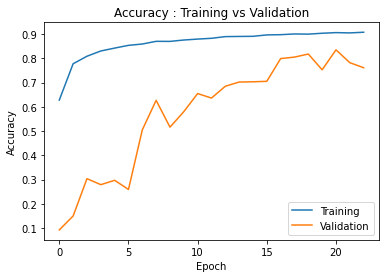

In [22]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])                
plt.plot(history['val_accuracy'])                  
plt.title('Accuracy : Training vs Validation')     
plt.ylabel('Accuracy')                              
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

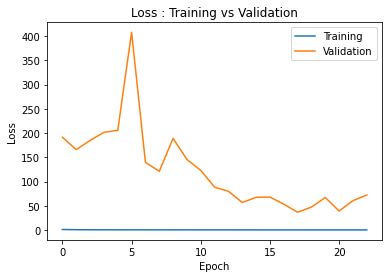

In [23]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])                  
plt.plot(history['val_loss'])                  
plt.title('Loss : Training vs Validation')    
plt.ylabel('Loss')                              
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
# 원핫 인코딩 해제 : 카테고리 중 가장 높은 값
train_y = y_train.argmax(axis=1)
test_y = y_test.argmax(axis=1)


pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

118/118 [==============================] - 0s 4ms/step
CNN
트레이닝 정확도 : 93.49%
테스트 정확도 : 91.99%
